# ARAD

In [161]:
import pandas as pd
import numpy as np
from datetime import datetime
import random

In [162]:
# Graphs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import dates
%matplotlib inline

In [163]:
sns.set_style('whitegrid')
# print(plt.style.available)

In [164]:
# define the list of ARAD chapters to track
chapters = ['loans', 'rates', 'gdp', 'cpi']

## 1. Dictionary - url

In [165]:
urls = dict(
loans_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=1538&p_uka=1%2C2%2C3&p_strid=AAD&p_od=200512&p_do=201906&p_lang=CS&p_format=2&p_decsep=.',
rates_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=49609&p_uka=1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14&p_strid=AAD&p_od=200401&p_do=201906&p_lang=CS&p_format=2&p_decsep=.',
gdp_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=3&p_sort=1&p_des=50&p_sestuid=29930&p_uka=1%2C2%2C3%2C4%2C5&p_strid=ACL&p_od=199603&p_do=201903&p_lang=CS&p_format=2&p_decsep=.',
cpi_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=6546&p_uka=1%2C2%2C3%2C4&p_strid=ACL&p_od=200001&p_do=201612&p_lang=CS&p_format=2&p_decsep=.'
)
# Source: https://www.cnb.cz/cnb/STAT.ARADY_PKG.hlavni_ukazatele?p_iframe=0&p_lang=CS

## 2. Dictionary - data

In [166]:
# dict 2 - data
data = {}
for chapter, chapter_url in zip(chapters,urls):
    data[chapter+'_data'] = pd.read_csv(urls[chapter_url],sep='|',skiprows=0,verbose=False,encoding ='cp1250',header=0)

In [167]:
# Converting and reindexing the data
for chapter in data:
    data[chapter].iloc[:,0] = pd.to_datetime(data[chapter].iloc[:,0])
    data[chapter].set_index('Období',inplace=True)

## 3. Dictionary - Relative changes

In [168]:
# dict 3 - data
data_rel = {}
for chapter in chapters:
    data_rel[chapter+'_rel'] = data[chapter+'_data'].pct_change(periods=12)
    #data[chapter+'_rel'].rename(columns = list(data[chapter+'_rel'].columns))
    data_rel[chapter+'_rel'].columns = ((str(col) + '_rel') for col in data_rel[chapter+'_rel'].columns)

In [169]:
# Merge data[chapter] with relative changes: data_rel[chapter]
for chapter in chapters:
    data[chapter + '_data'] = pd.merge(data[chapter + '_data'],data_rel[chapter + '_rel'],right_index=True,left_index=True)

## PLOTTING

In [170]:
# Macro plot set-up
years = dates.YearLocator()   # every year
months = dates.MonthLocator()  # every month
years_fmt = dates.DateFormatter('%Y')
months_fmt = dates.DateFormatter('%b / %y')

### 1. Loans

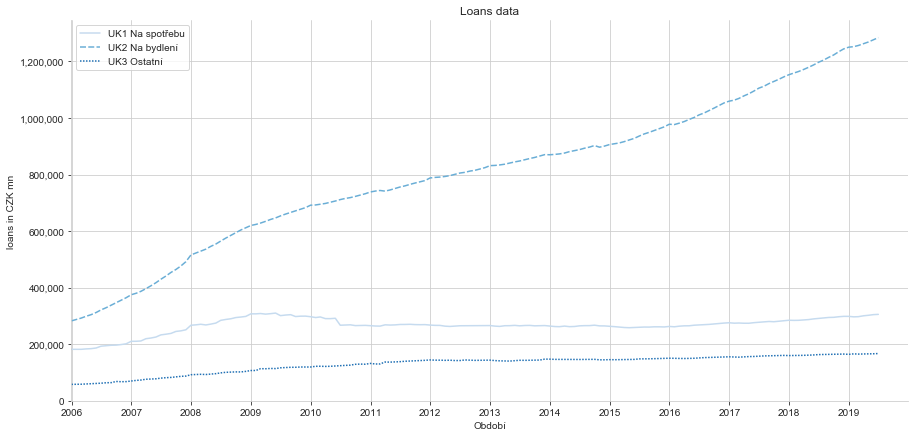

In [171]:
# Plotting loans in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['loans_data'][['UK1 Na spotřebu','UK2 Na bydlení','UK3 Ostatní']],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Loans data')
ax.set(ylabel='loans in CZK mn')
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

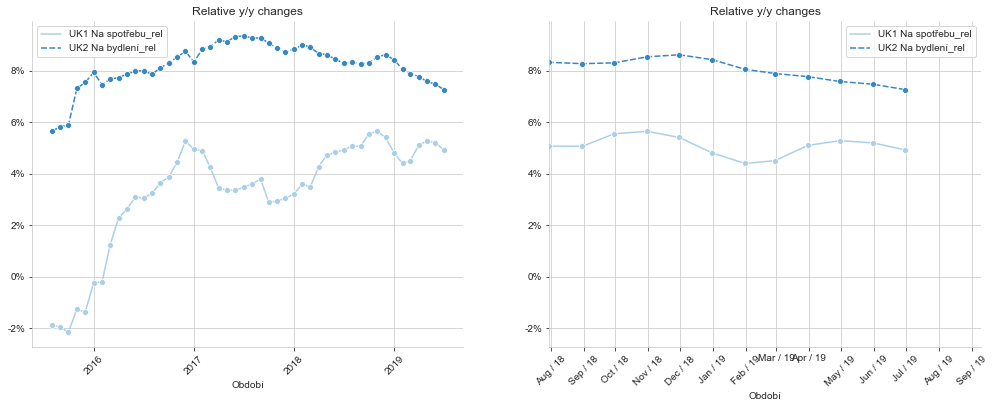

In [172]:
Title_relative = 'Relative y/y changes'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
data_rel = data['loans_data'].iloc[-48:,3:5]    # selects data subset for the last 4 years

ax1 = sns.lineplot(data=data_rel, palette='Blues', ax=ax1, marker="o")
ax2 = sns.lineplot(data=data_rel, palette='Blues', ax=ax2, marker="o")
#ax1.plot(data_rel, linewidth=2, marker='o', markersize=4)
#ax2.plot(data_rel, linewidth=2, marker='o', markersize=4)

ax1.set_title(Title_relative)
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
ax1.set_xticklabels(data_rel.index.strftime("%b / %y"), rotation = 45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
ax2.set_xlim(left=data_rel.index[-12])
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xticklabels(data_rel.index[-12:].strftime("%b / %y"), rotation = 45)

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(months_fmt)
ax2.xaxis.set_minor_locator(months)

for ax in (ax1,ax2):
    ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

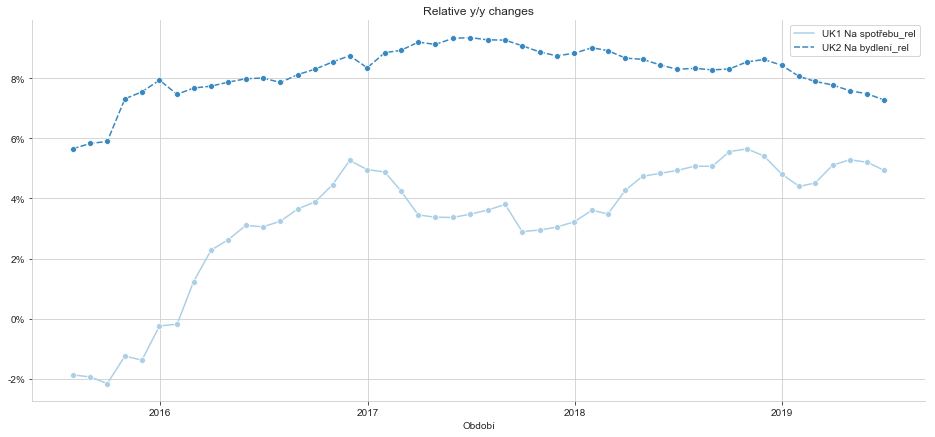

In [175]:
Title_relative = 'Relative y/y changes'
plt.figure(figsize=(16, 7))
ax = sns.lineplot(data=data_rel,palette='Blues',size = 2,marker='o')

plt.title(Title_relative)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
#ax.set_xticklabels(data_rel.index,rotation = 45)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
#ax.xaxis.set_minor_formatter(months_fmt)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

### 2. Rates

In [134]:
data['rates_data'].drop(axis=1,columns=list(data['rates_data'].columns)[14:],inplace=True)
data['rates_data']

,UK1 Jednodenní vklady (%),UK2 z toho: vklady na běľných účtech (%),UK3 z toho: vklady na spořících účtech (%),UK4 Vklady s výpovědní lhůtou (%),UK5 Vklady s dohodnutou splatností (%),UK6 Úvěry na spotřebu (%),UK7 Úvěry na bydlení (%),UK8 z toho: hypoteční úvěry (%),UK9 z toho: stavební spoření - úvěry na bydlení (%),UK10 Úvěry ostatní (%),UK11 Úvěry kontokorentní a revolvingové (%),UK12 z toho: kontokorentní úvěry (%),UK13 Pohledávky z kreditních karet (%),UK14 z toho: úročené úvěry z kreditních karet (%)
Období,,,,,,,,,,,,,,
2004-01-31,0.51,0.57,0.15,1.27,1.25,14.53,5.37,5.07,5.84,5.65,NaN,13.50,21.29,NaN
2004-02-29,0.50,0.56,0.15,1.27,1.20,14.96,5.42,5.08,5.86,5.79,NaN,13.30,21.20,NaN
2004-03-31,0.51,0.56,0.17,1.30,1.23,15.03,5.32,4.90,5.82,10.64,NaN,13.63,21.27,NaN
2004-04-30,0.51,0.56,0.18,1.31,1.25,14.50,5.24,4.81,5.74,5.69,NaN,13.71,21.36,NaN
2004-05-31,0.52,0.57,0.18,1.33,1.07,14.69,5.08,4.67,5.54,5.37,NaN,13.76,21.33,NaN
2004-06-30,0.52,0.57,0.18,1.36,1.31,14.95,5.01,4.71,5.49,5.70,NaN,13.53,21.36,NaN
2004-07-31,0.50,0.55,0.15,1.43,1.49,14.90,5.17,4.93,5.45,6.08,NaN,13.73,21.37,NaN
2004-08-31,0.50,0.55,0.15,1.44,1.60,15.23,5.17,4.98,5.40,5.85,NaN,13.87,21.41,NaN
2004-09-30,0.50,0.56,0.12,1.49,1.74,14.52,5.31,5.09,5.48,6.43,NaN,13.82,21.33,NaN


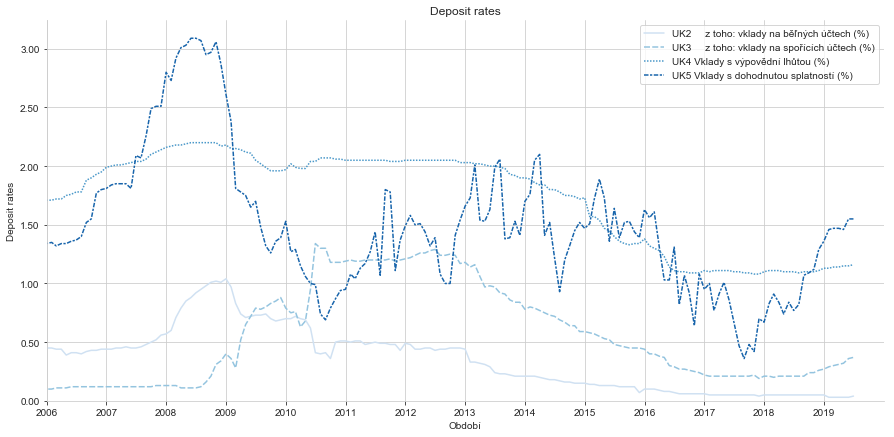

In [186]:
# Plotting vklady in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['rates_data'].iloc[:,1:5],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Deposit rates')
ax.set(ylabel='Deposit rates')
ax.set_yticklabels(['{0:.2f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

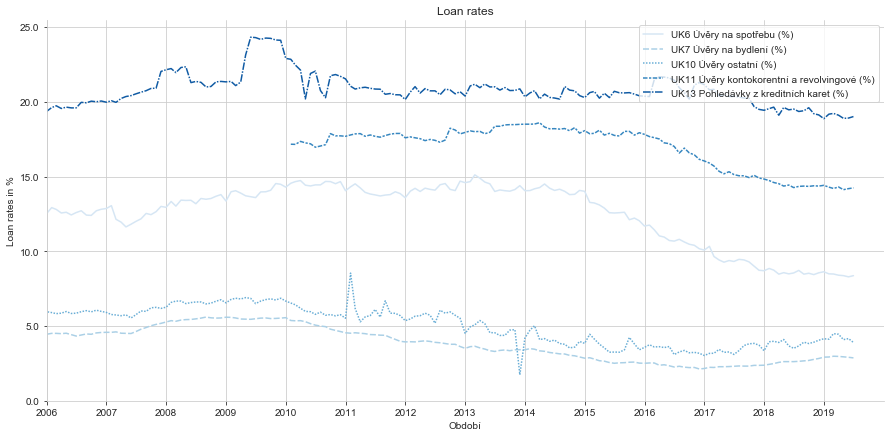

In [202]:
# Plotting loan rates in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['rates_data'].iloc[:,[5,6,9,10,12]],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Loan rates')
ax.set(ylabel='Loan rates in %')
ax.set_yticklabels(['{0:.1f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

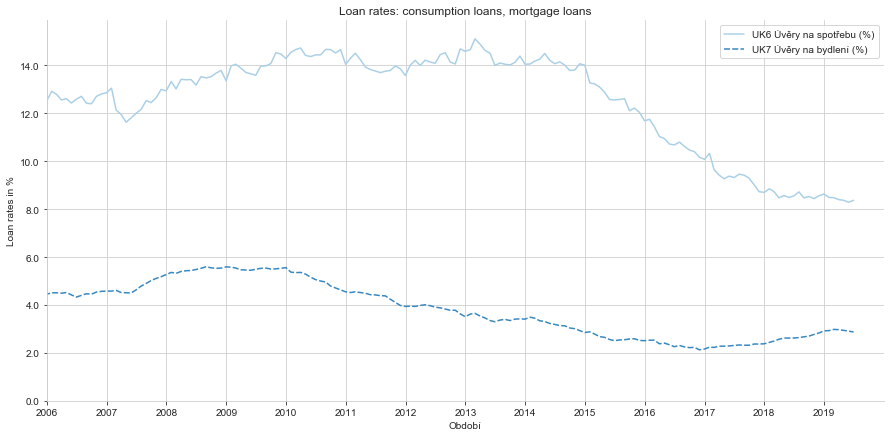

In [203]:
# Plotting loan rates in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['rates_data'].iloc[:,[5,6]],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Loan rates: consumption loans, mortgage loans')
ax.set(ylabel='Loan rates in %')
ax.set_yticklabels(['{0:.1f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

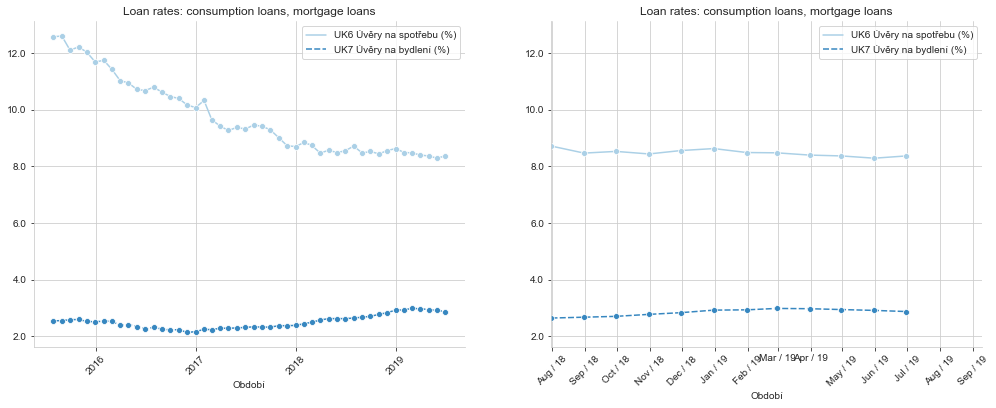

In [206]:
Title_relative = 'Loan rates: consumption loans, mortgage loans'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
data_rel = data['rates_data'].iloc[-48:,[5,6]]  # selects data subset for the last 4 years

ax1 = sns.lineplot(data=data_rel, palette='Blues', ax=ax1, marker="o")
ax2 = sns.lineplot(data=data_rel, palette='Blues', ax=ax2, marker="o")
#ax1.plot(data_rel, linewidth=2, marker='o', markersize=4)
#ax2.plot(data_rel, linewidth=2, marker='o', markersize=4)

ax1.set_title(Title_relative)
ax1.set_yticklabels(['{0:.1f}'.format(x) for x in ax1.get_yticks()])
ax1.set_xticklabels(data_rel.index.strftime("%b / %y"), rotation = 45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
ax2.set_xlim(left=data_rel.index[-12])
ax2.set_yticklabels(['{0:.1f}'.format(x) for x in ax2.get_yticks()])
ax2.set_xticklabels(data_rel.index[-12:].strftime("%b / %y"), rotation = 45)

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(months_fmt)
ax2.xaxis.set_minor_locator(months)

for ax in (ax1,ax2):
    ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

### 3. GDP

In [210]:
data['gdp_data'].drop(axis=1,columns=list(data['gdp_data'].columns)[5:],inplace=True

,UK1 Jednodenní vklady (%),UK2 z toho: vklady na běľných účtech (%),UK3 z toho: vklady na spořících účtech (%),UK4 Vklady s výpovědní lhůtou (%),UK5 Vklady s dohodnutou splatností (%),UK6 Úvěry na spotřebu (%),UK7 Úvěry na bydlení (%),UK8 z toho: hypoteční úvěry (%),UK9 z toho: stavební spoření - úvěry na bydlení (%),UK10 Úvěry ostatní (%),...,UK5 Vklady s dohodnutou splatností (%)_rel,UK6 Úvěry na spotřebu (%)_rel,UK7 Úvěry na bydlení (%)_rel,UK8 z toho: hypoteční úvěry (%)_rel,UK9 z toho: stavební spoření - úvěry na bydlení (%)_rel,UK10 Úvěry ostatní (%)_rel,UK11 Úvěry kontokorentní a revolvingové (%)_rel,UK12 z toho: kontokorentní úvěry (%)_rel,UK13 Pohledávky z kreditních karet (%)_rel,UK14 z toho: úročené úvěry z kreditních karet (%)_rel
Období,,,,,,,,,,,,,,,,,,,,,
2004-01-31,0.51,0.57,0.15,1.27,1.25,14.53,5.37,5.07,5.84,5.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-29,0.50,0.56,0.15,1.27,1.20,14.96,5.42,5.08,5.86,5.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-31,0.51,0.56,0.17,1.30,1.23,15.03,5.32,4.90,5.82,10.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-30,0.51,0.56,0.18,1.31,1.25,14.50,5.24,4.81,5.74,5.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-31,0.52,0.57,0.18,1.33,1.07,14.69,5.08,4.67,5.54,5.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-30,0.52,0.57,0.18,1.36,1.31,14.95,5.01,4.71,5.49,5.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-31,0.50,0.55,0.15,1.43,1.49,14.90,5.17,4.93,5.45,6.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-31,0.50,0.55,0.15,1.44,1.60,15.23,5.17,4.98,5.40,5.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-09-30,0.50,0.56,0.12,1.49,1.74,14.52,5.31,5.09,5.48,6.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
data['gdp_data'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1996-03-31 to 2019-03-31
Data columns (total 5 columns):
UK1 Stálé ceny roku 2010 v mld. Kč      93 non-null float64
UK2 Mezičtvrtletní změny                92 non-null float64
UK3  Meziroční změny                    89 non-null float64
UK4 Deflátory - mezičtvrtletní změny    92 non-null float64
UK5 Deflátory -  meziroční změny        89 non-null float64
dtypes: float64(5)
memory usage: 6.9 KB


In [216]:
data['loans_data'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2005-12-31 to 2019-06-30
Data columns (total 6 columns):
UK1 Na spotřebu        163 non-null float64
UK2 Na bydlení         163 non-null float64
UK3 Ostatní            163 non-null float64
UK1 Na spotřebu_rel    151 non-null float64
UK2 Na bydlení_rel     151 non-null float64
UK3 Ostatní_rel        151 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


### Loans to GDP

In [ ]:
plt.figure(figsize=(15, 7))
data_rel = data['rates_data'].iloc[-48:,[5,6]]  # selects data subset for the last 4 years
ax = sns.lineplot(data=data['loans_data'][['UK1 Na spotřebu','UK2 Na bydlení','UK3 Ostatní']],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data_rel.index[0],'2019-12-31')
plt.title('Loans data')
ax.set(ylabel='loans in CZK mn')
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

In [219]:
# need quarterly data for loans
# need to pair loans with GDP acc. to dates!

### 4. Inflation

### Trash 

In [230]:
data['loans_data'].index[0]

Timestamp('2005-12-31 00:00:00')

### Matplotlib plotting:

In [ ]:
# Plotting loans relative changes
Title_relative = 'Relative y/y changes'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))

ax1 = sns.lineplot(data=data['loans_data'],x = data['loans_data'].index,y = data['loans_data'].iloc[:,3],palette='Blues', ax=ax1)
ax2 = sns.lineplot(data=data['loans_data'],x = data['loans_data'].index,y = data['loans_data'].iloc[:,4],palette='Blues', ax=ax2)

ax1.set_title(Title_relative)
#ax1.set_ylim(top=0.1)
#ax1.set_xlim(left=data['loans_data'].index[60])
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
#ax2.set_xlim(left=data['loans_data'].index[120])
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

sns.despine()